In [127]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches

In [128]:
def partition(number):
    answer = set()
    answer.add((number, ))
    for x in range(1, number):
        for y in partition(number - x):
            answer.add(tuple(sorted((x, ) + y)))
    return answer

def all_partitions_below(number):
    answer = set()
    answer.add((number, ))
    for x in range(1, number):
        partition_lower = all_partitions_below(number - x)
        answer = answer.union(partition_lower)
        for y in partition_lower:
            answer.add(tuple(sorted((x, ) + y)))
    return answer

def non_trivial_partitions(n):
    all_partitions = all_partitions_below(n)
    for i in range(1, n + 1):
        all_partitions.remove((i,))
        pn = sorted(list(all_partitions), key=lambda part: np.sum(part))
    return pn

# Figure 3

1 1 [ 974.9    0.     0.     0.    19.3  460.9 1044.9    0. ]
1 2 [ 978.5    0.     0.     0.     7.7  425.6 1088.2    0. ]
1 3 [991.    0.    0.    0.    0.  822.7 686.3   0. ]
1 4 [987.8   0.    0.    0.   13.1 788.4 710.7   0. ]
1 5 [ 986.     0.     0.     0.     0.   460.7 1053.3    0. ]
2 3 [ 959.7    0.     0.     0.     0.  1505.5   34.8    0. ]
2 4 [ 978.4    0.     0.     0.     3.8 1517.8    0.     0. ]
2 5 [ 967.4    0.     0.     0.     0.  1515.4   17.2    0. ]


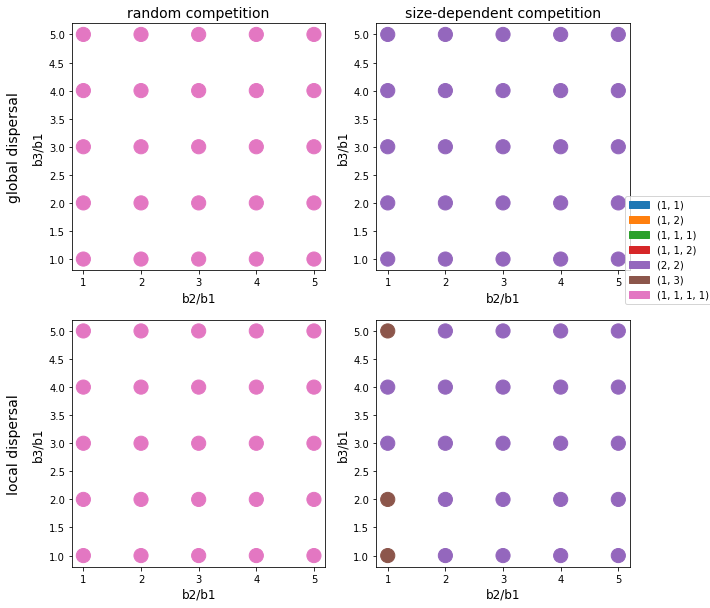

In [132]:
T = 1000
M = 50
n = 4
b1 = 1
b2s = [1,2,3,4,5]
b3s = b2s
d = 0
r = 2
ss = [0,1]
m = 0
localss = [False,True]
reps = range(10)

modes = non_trivial_partitions(n)
nmodes = len(modes)

fig, axs = plt.subplots(2,2, figsize=(10,10))

for s in ss:
    for local in localss:

        results = []
        for b2 in b2s:
            for b3 in b3s:
                counts = []
                for rep in reps:
                    _,mos,_ = np.load('data/fig3_%dT_%dM_%dn_%db1_%db2_%db3_%dd_%dr_%ds_%sm_%sw_%slocal_%drep.npy' %(T,M,n,b1,b2,b3,d,r,s,m,m,local,rep))
                    counts.append([np.sum(mos==i) for i in range(nmodes+1)]) #abundance of each mode
            
                if sum(np.mean(counts,axis=0)>0)>2:
                    print(b2, b3, np.mean(counts,axis=0))
                winner = np.argmax(np.mean(counts,axis=0)[1:]) #mode ix with max mean abundance
                results.append([b2,b3,winner])
        results = np.array(results)
        
        ax = axs[1 if local else 0,s]
        ax.scatter(results[:,0], results[:,1], c=[mpl.cm.tab10(i) for i in results[:,2]], s=200)
        ax.set_xlabel('b2/b1', fontsize=12)
        ax.set_ylabel('b3/b1', fontsize=12)
    
        if not local:
            if s==0:
                ax.set_title('random competition', fontsize=14)
            else:
                ax.set_title('size-dependent competition', fontsize=14)
        if s==0:
            if not local:
                ax.text(-0.2, 3, 'global dispersal', fontsize=14, rotation='vertical', horizontalalignment='center', verticalalignment='center')
            else:
                ax.text(-0.2, 3, 'local dispersal', fontsize=14, rotation='vertical', horizontalalignment='center', verticalalignment='center')

handles = [mpatches.Patch(color=mpl.cm.tab10(i), label=mode) for i,mode in enumerate(modes)]
fig.legend(handles=handles, loc=(0.88,0.5))
# plt.savefig('plots/fig3_n%d.jpg' %n)
plt.show()

# Figure 4

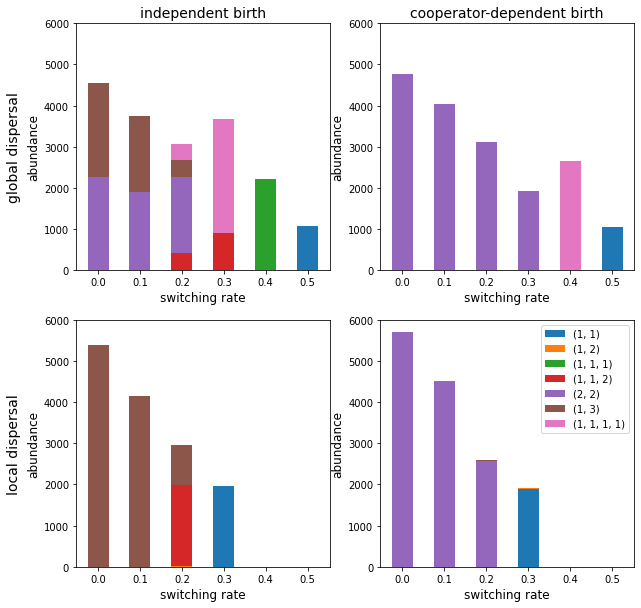

In [35]:
T = 5000
M = 100
n = 4
b = 0.3
ass = [0,1]
d = 0.03
r = 2
s = 1
ms = [0,0.1,0.2,0.3,0.4,0.5]
localss = [False,True]
reps = range(10)

modes = non_trivial_partitions(n)
nmodes = len(modes)

fig, axs = plt.subplots(2,2, figsize=(10,10))

for a in ass:
    for local in localss:

        mcounts = []
        for m in ms:
            counts = []
            for rep in reps:
                _,mos,_ = np.load('data/fig4_%dT_%dM_%dn_%.1fb_%da_%.2fd_%dr_%ds_%sm_%sw_%slocal_%drep.npy' %(T,M,n,b,a,d,r,s,m,m,local,rep))
                counts.append([np.sum(mos==i) for i in range(nmodes+1)])
            mcounts.append(np.mean(counts, axis=0))
        mcounts = np.array(mcounts)
        
        bottom = np.zeros(len(ms))
        ax = axs[1 if local else 0, a]
        for i in range(nmodes):
            ax.bar(ms, mcounts[:,i+1], bottom=bottom, width=0.05, label=modes[i])
            bottom += mcounts[:,i+1]
        ax.set_xlabel('switching rate', fontsize=12)
        ax.set_ylabel('abundance', fontsize=12)
        ax.set_ylim(0,6000)
    
        if not local:
            if a==0:
                ax.set_title('independent birth', fontsize=14)
            else:
                ax.set_title('cooperator-dependent birth', fontsize=14)
        if a==0:
            if not local:
                ax.text(-0.2, 3000, 'global dispersal', fontsize=14, rotation='vertical', horizontalalignment='center', verticalalignment='center')
            else:
                ax.text(-0.2, 3000, 'local dispersal', fontsize=14, rotation='vertical', horizontalalignment='center', verticalalignment='center')

plt.legend()
# plt.savefig('plots/fig4_n%d.jpg' %n)
plt.show()

# Figure S1

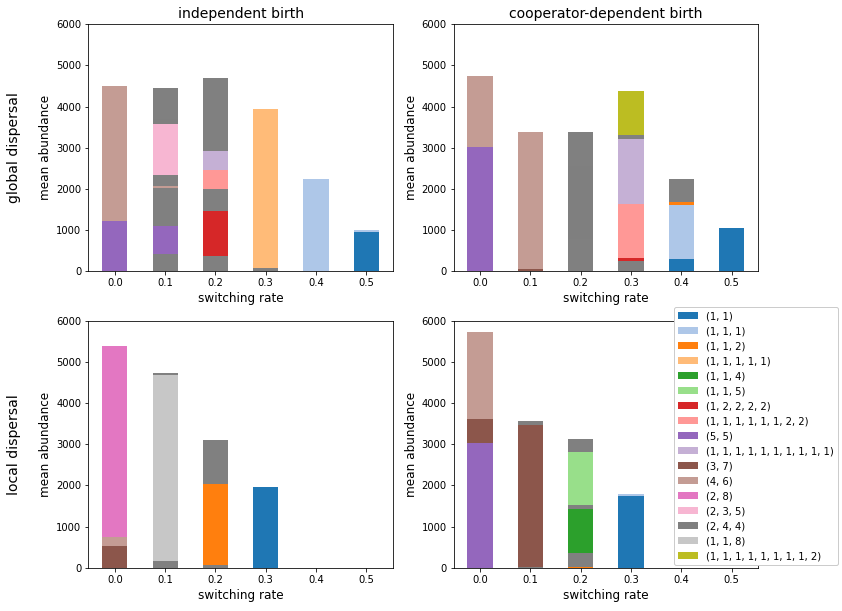

In [20]:
T = 5000
M = 100
n = 10
b=0.3
ass = [0,1]
d=0.03
r=2
s=1
ms = [0,0.1,0.2,0.3,0.4,0.5]
localss = [False,True]
reps = range(10)

modes = non_trivial_partitions(n)
nmodes = len(modes)

all_mcounts=[]
for a in ass:
    for local in localss:

        mcounts = []
        for m in ms:
            counts = []
            for rep in reps:
                _,mos,_ = np.load('data/fig4_%dT_%dM_%dn_%.1fb_%da_%.2fd_%dr_%ds_%sm_%sw_%slocal_%drep.npy' %(T,M,n,b,a,d,r,s,m,m,local,rep))
                counts.append([np.sum(mos==i) for i in range(nmodes+1)])
            mcounts.append(np.mean(counts, axis=0))
        mcounts = np.array(mcounts)
        all_mcounts.append(mcounts)
all_mcounts=np.array(all_mcounts)

ixs = []
for mcounts in all_mcounts:
    for i in range(nmodes):
        if i in ixs:
            pass
        elif np.max(mcounts[:,i+1])>1000:
            ixs.append(i)

fig, axs = plt.subplots(2,2, figsize=(12,10))

k = 0
for a in ass:
    for local in localss:
        
        bottom = np.zeros(len(ms))
        mcounts = all_mcounts[k]
        k += 1
        ax = axs[1 if local else 0,a]
        j = 0
        for i in range(nmodes):
            if i in ixs:
                ax.bar(ms, mcounts[:,i+1], bottom=bottom, width=0.05, label=modes[i], color=mpl.cm.tab20(j))                 
                j += 1
            else:
                ax.bar(ms, mcounts[:,i+1], bottom=bottom, width=0.05, color='gray')
            bottom += mcounts[:,i+1]
        ax.set_xlabel('switching rate', fontsize=12)
        ax.set_ylabel('mean abundance', fontsize=12)
#         ax.set_title('a=%d, globall=%d' %(a,globall))
        if not local:
            if a==0:
                ax.set_title('independent birth', fontsize=14)
            else:
                ax.set_title('cooperator-dependent birth', fontsize=14)
        if a==0:
            if not local:
                ax.text(-0.2, 3000, 'global dispersal', fontsize=14, rotation='vertical', horizontalalignment='center', verticalalignment='center')
            else:
                ax.text(-0.2, 3000, 'local dispersal', fontsize=14, rotation='vertical', horizontalalignment='center', verticalalignment='center')
        ax.set_ylim(0,6000)
#         ax.legend()

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc=(0.8,0.075), fancybox=True, framealpha=1)
# plt.savefig('plots/fig4_n%d.jpg' %n)
plt.show()

# Figure 5

/tmp/ipykernel_131398/2980113300.py:23: RuntimeWarning: invalid value encountered in true_divide
  counts.append(np.sum(ncs/gss>0)/np.sum(gss>0))


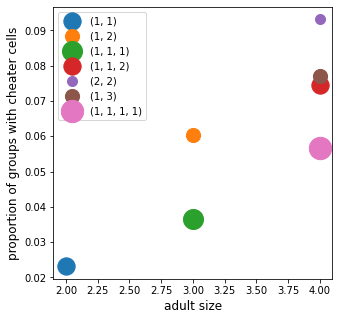

In [93]:
T = 1000
M = 50
n = 4
b = 0.3
a = 0
d = 0.03
r = 2
s = 1
m = 0.2
local = False
reps = range(1)

modes = non_trivial_partitions(n)
nmodes = len(modes)

fig, ax = plt.subplots(1,1, figsize=(5,5))

mcounts = []
for mode in range(nmodes):
    counts = []
    for rep in reps:
        gss,_,ncs = np.load('data/fig5_%dmode_%dT_%dM_%dn_%.1fb_%da_%.2fd_%dr_%ds_%sm_%sw_%slocal_%drep.npy' %(mode,T,M,n,b,a,d,r,s,m,m,local,rep))
        counts.append(np.sum(ncs/gss>0)/np.sum(gss>0))
    mcounts.append(np.mean(counts, axis=0))
mcounts = np.array(mcounts)
        
for mode in range(nmodes):
    ax.scatter(sum(modes[mode]), mcounts[mode], label=modes[mode], s=100*(1+np.sum(np.array(modes[mode])==1)))
ax.set_xlabel('adult size', fontsize=12)
ax.set_ylabel('proportion of groups with cheater cells', fontsize=12)
# ax.set_ylim(0,1)
    
plt.legend()
# plt.savefig('plots/fig5_n%d.jpg' %n)
plt.show()

# Figure S2

/tmp/ipykernel_131398/1750444037.py:23: RuntimeWarning: invalid value encountered in true_divide
  counts.append(np.sum(ncs/gss>0)/np.sum(gss>0))
/tmp/ipykernel_131398/1750444037.py:23: RuntimeWarning: invalid value encountered in long_scalars
  counts.append(np.sum(ncs/gss>0)/np.sum(gss>0))


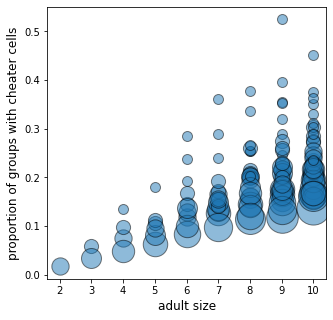

In [99]:
T = 1000
M = 50
n = 10
b = 0.3
a = 0
d = 0.03
r = 2
s = 1
m = 0.2
local = False
reps = range(1)

modes = non_trivial_partitions(n)
nmodes = len(modes)

fig, ax = plt.subplots(1,1, figsize=(5,5))

mcounts = []
for mode in range(nmodes):
    counts = []
    for rep in reps:
        gss,_,ncs = np.load('data/fig5_%dmode_%dT_%dM_%dn_%.1fb_%da_%.2fd_%dr_%ds_%sm_%sw_%slocal_%drep.npy' %(mode,T,M,n,b,a,d,r,s,m,m,local,rep))
        counts.append(np.sum(ncs/gss>0)/np.sum(gss>0))
    mcounts.append(np.mean(counts, axis=0))
mcounts = np.array(mcounts)
        
for mode in range(nmodes):
    ax.scatter(sum(modes[mode]), mcounts[mode], label=modes[mode], s=100*(1+np.sum(np.array(modes[mode])==1)), color=mpl.cm.tab10(0), alpha=0.5, edgecolor='k')
ax.set_xlabel('adult size', fontsize=12)
ax.set_ylabel('proportion of groups with cheater cells', fontsize=12)
# ax.set_ylim(0,1)
    
# plt.legend()
# plt.savefig('plots/fig5_n%d.jpg' %n)
plt.show()

In [123]:
np.random.binomial(10,0)

0

In [126]:
np.random.random?

Docstring:
random(size=None)

Return random floats in the half-open interval [0.0, 1.0). Alias for
`random_sample` to ease forward-porting to the new random API.
Type:      builtin_function_or_method
